In [1]:
# project specific
import numpy as np
import matplotlib.pyplot as plt
import os
#import functions as fitpatterns
import itertools


load data

In [2]:
num = 1 # number of lists passed in
ll= 10
data = [[int(j+1)+k*ll for j in range(ll)] for k in range(num)]
np.savetxt('datafile/K02_temp_data_structure.txt',data,delimiter=',')
lists = [int(i+1) for i in range(num)]
np.savetxt('datafile/K02_temp_list_ids.txt',lists)


LSA_path = '/mnt/bucket/people/qiongz/optimalmemory/pyCMR2/K02_files/K02_LSA.txt'
data_path = '/mnt/bucket/people/qiongz/CMRversions/datafile/K02_temp_data_structure.txt'    
LSA_mat = np.loadtxt(LSA_path, delimiter=',', dtype=np.float32)        
data_pres = np.loadtxt(data_path, delimiter=',')
data_pres = np.reshape(data_pres, (1, ll))

param_dict = {

    'beta_enc':  0.7887626184661226,           # rate of context drift during encoding
    'beta_rec':  0.49104864172027485,           # rate of context drift during recall
    'beta_rec_post': 1,      # rate of context drift between lists
                                    # (i.e., post-recall)

    'gamma_fc': 0.4024001271645564,  # learning rate, feature-to-context
    'gamma_cf': 1,  # learning rate, context-to-feature
    'scale_fc': 1 - 0.4024001271645564,
    'scale_cf': 0,


    's_cf': 0.0,       # scales influence of semantic similarity
                            # on M_CF matrix

    's_fc': 0.0,            # scales influence of semantic similarity
                            # on M_FC matrix.
                            # s_fc is first implemented in
                            # Healey et al. 2016;
                            # set to 0.0 for prior papers.

    'phi_s': 4.661547054594787,      # primacy parameter
    'phi_d': 2.738934338758688,      # primacy parameter


    'epsilon_s': 0.0,      # baseline activiation for stopping probability 
    'epsilon_d': 2.723826426356652,        # scale parameter for stopping probability 

    'k':  5.380182482069175,        # scale parameter in luce choice rule during recall

    # parameters specific to optimal CMR:
    'primacy': 0.0,
    'enc_rate': 1.0,

}




 Encoding Phase start here:





 Temporal and Semantic Associative Matrix (After Encoding):


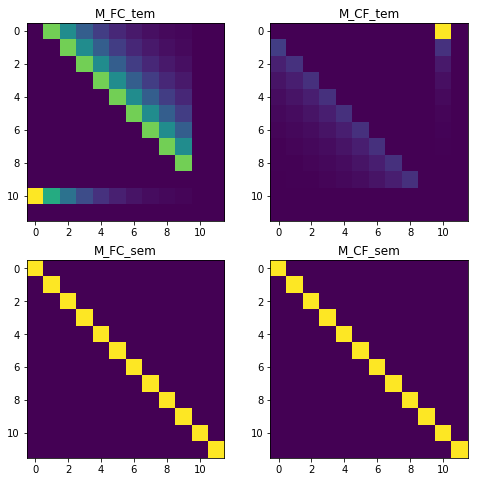




 Retrieval Phase start here:


(1)
The just-recalled item is 8
Remaining items are [0, 1, 2, 3, 4, 5, 6, 7, 9]
Here is current context vector:


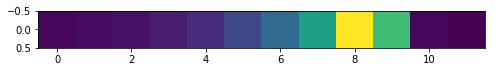



(2)
The just-recalled item is 7
Remaining items are [0, 1, 2, 3, 4, 5, 6, 9]
Here is current context vector:


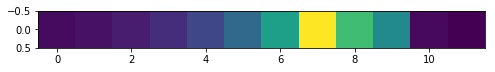



(3)
The just-recalled item is 9
Remaining items are [0, 1, 2, 3, 4, 5, 6]
Here is current context vector:


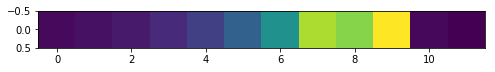



(4)
The just-recalled item is None
Remaining items are [0, 1, 2, 3, 4, 5, 6]
Here is current context vector:


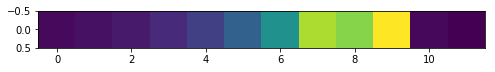

In [20]:

# init. lists to store CMR2 output
resp_values = []
support_values = []

# create CMR2 object
this_CMR = CMR2_simple.CMR2(
    recall_mode=0, params=param_dict,
    LSA_mat=LSA_mat, pres_sheet = data_pres, rec_sheet = data_pres)

# layer LSA cos theta values onto the weight matrices
this_CMR.create_semantic_structure()

# Run CMR2 for each list
for i in range(1):
    # present new list
    print("\n\n\n Encoding Phase start here:\n\n")
    this_CMR.present_list()

    # print Ms
    print("\n\n\n Temporal and Semantic Associative Matrix (After Encoding):")
    plt.rcParams['figure.figsize'] = (8,8)
    plt.subplot(2,2,1)
    plt.imshow(this_CMR.M_FC_tem)
    plt.title("M_FC_tem")    
    plt.subplot(2,2,2)
    plt.imshow(this_CMR.M_CF_tem)            
    plt.title("M_CF_tem")    
    plt.subplot(2,2,3)
    plt.imshow(this_CMR.M_FC_sem) 
    plt.title("M_FC_sem")
    plt.subplot(2,2,4)
    plt.imshow(this_CMR.M_CF_sem)
    plt.title("M_CF_sem")
    plt.show()
    
    # recall session
    print("\n\n\n Retrieval Phase start here:")
    this_CMR.recall_start()
    rec_item = -1
    itr = 0
    while rec_item is not None:
        # start recall
        rec_item = this_CMR.recall_step(0.5,0.4)
        itr = itr + 1      
        
        # print current state
        print("\n\n({})".format(itr))
        print("The just-recalled item is {}".format(rec_item))
        remain = [i for i in range(ll) if this_CMR.torecall[0][i]>0]
        print("Remaining items are {}".format(remain))  
        plt.rcParams['figure.figsize'] = (8,1)
        print("Here is current context vector:") 
        plt.imshow(this_CMR.c_net.T) 
        plt.show()      

    # append recall responses & times
    #resp_values.append(rec_items_i)
    #support_values.append(support_i)
#print(resp_values)